**Project 1**

# Imports and Other Setup

## Imports

In [ ]:
from collections import Counter
import gzip
import json
import nltk
import matplotlib.pyplot as plt
import re
import wordcloud

## Setup Stop Words and Lemmatizer

In [ ]:
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Functions

## `tokenize(doc)`

`tokenize(doc)` takes a document (a string) and returns a list of tokens. For example, `tokenize('Hello, class! Hello, world!')` returns `['hello','class','hello','world']`.

In [ ]:
def tokenize(doc):
  clean_doc = doc
  clean_doc = clean_doc.lower()
  clean_doc = re.sub('\s',' ',clean_doc)
  clean_doc = re.sub('[^A-Za-z0-9 ]+','',clean_doc)
  clean_doc = re.sub(' +',' ',clean_doc)
  clean_doc = clean_doc.strip()
  tokens = clean_doc.split(' ')
  final_tokens = []
  for token in tokens:
    if token not in stop_words:
      lemmatized_token = lemmatizer.lemmatize(token)
      final_tokens.append(lemmatized_token)
  return(final_tokens)

In [ ]:
# example
doc1 = 'Hello, class! Hello, world!'
tokenize(doc1)

['hello', 'class', 'hello', 'world']

## `generateWordFrequencies(doc)`

`generateWordFrequencies(doc)` takes a document (a string) and returns a Counter (a special type of Python dictionary) containing tokens and a count of how many times the token occured in the doc. For example, `generateWordFrequencies('Hello, class! Hello, world!')` returns `{'hello':2,'class':1,'world':1}`.

In [ ]:
def generateWordFrequencies(doc):
  word_frequencies = Counter()
  tokens = tokenize(doc)
  for token in tokens:
    word_frequencies[token] += 1
  return(word_frequencies)

In [ ]:
# example
doc1 = 'Hello, class! Hello, world!'
generateWordFrequencies(doc1)

Counter({'hello': 2, 'class': 1, 'world': 1})

## `generateCorpusWordFrequencies(corpus)`

`generateCorpusWordFrequencies(corpus)` takes a corpus (a list of strings) and returns a Counter (a special type of Python dictionary) containing tokens and a count of how many times the token occured in the corpus. Same as `generateWordFrequencies(doc)` but for a list of documents instead of a single document. 

In [ ]:
def generateCorpusWordFrequencies(corpus):
  corpus_word_frequencies = Counter()
  for doc in corpus:
    doc_word_frequencies = generateWordFrequencies(doc)
    corpus_word_frequencies = corpus_word_frequencies + doc_word_frequencies
  return(corpus_word_frequencies)

In [ ]:
# example
doc1 = 'Hello, class! Hello, world!'
doc2 = 'Hello, Hello, Hello!'
corpus1 = [doc1,doc2]
generateCorpusWordFrequencies(corpus1)

Counter({'hello': 5, 'class': 1, 'world': 1})

## `generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b)`

`generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b)` takes two Counters of tokens and frequency counts, as can be generated by `generateWordFrequencies(doc)` or `generateCorpusWordFrequencies(corpus)`, and returns a Counter of the differences between the two. For example, `generateWordFrequencyDeltas({'hello':2,'world':1},{'hello':1,'world':2,'bye':3})` returns `{'hello':1,'world':-1,'bye':-3}`.

In [ ]:
def generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b):
  word_frequencies_delta = word_frequencies_a.copy()
  word_frequencies_delta.subtract(word_frequencies_b)
  return(word_frequencies_delta)

In [ ]:
# example
word_frequencies_1 = Counter({'hello':2,'world':1})
word_frequencies_2 = Counter({'hello':1,'world':2,'bye':3})
generateWordFrequencyDeltas(word_frequencies_1,word_frequencies_2)

Counter({'hello': 1, 'world': -1, 'bye': -3})

## `generateWordCloud(word_frequencies)`

`generateWordCloud(word_frequencies)` takes a dictionary of tokens and frequency counts, as can be generated by `generateWordFrequencies(doc)` or `generateCorpusWordFrequencies(corpus)` or `generateWordFrequencyDeltas(word_frequencies_a,word_frequencies_b)` and uses this to generate and display a word cloud. 

In [ ]:
def generateWordCloud(word_frequencies):
  wc = wordcloud.WordCloud()
  wc.generate_from_frequencies(word_frequencies)
  plt.figure(figsize=[20,10])
  plt.axis('off')
  plt.imshow(wc,interpolation='bilinear')

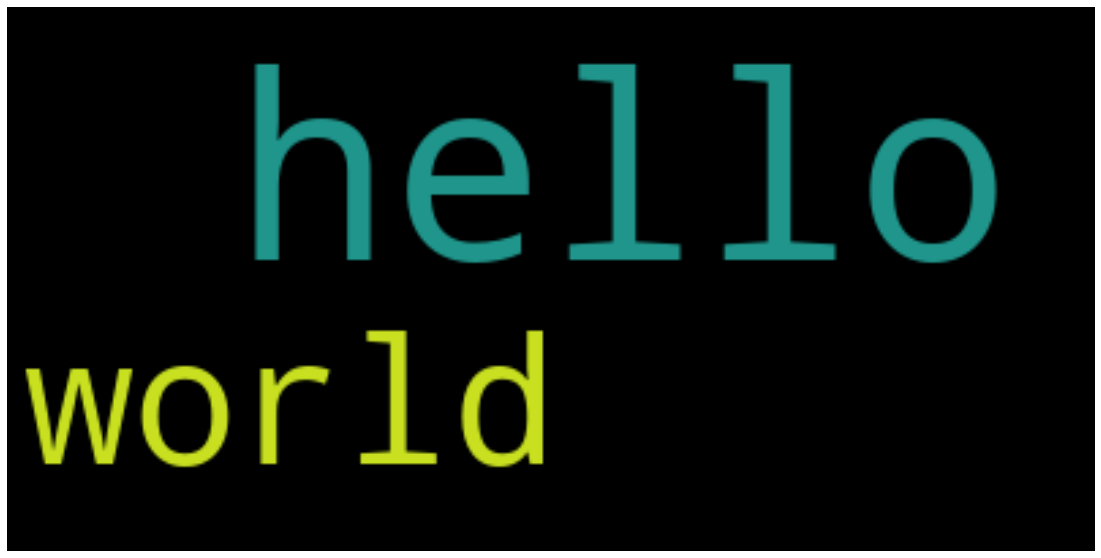

In [ ]:
# example
word_frequencies_1 = Counter({'hello':5,'world':2})
generateWordCloud(word_frequencies_1)

# Download and Process Amazon Data

We download a review file that contains a list of reviews and a meta file that contains a list of products. Both files are for the Appliance category. See http://deepyeti.ucsd.edu/jianmo/amazon/ for additional details. 

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_Appliances.json.gz
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Appliances.json.gz

--2022-09-12 23:51:34--  http://deepyeti.ucsd.edu/jianmo/amazon/metaFiles2/meta_Appliances.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59884788 (57M) [application/octet-stream]
Saving to: ‘meta_Appliances.json.gz.1’

meta_Appliances.jso 100%[===================>]  57.11M   101MB/s    in 0.6s    

2022-09-12 23:51:35 (101 MB/s) - ‘meta_Appliances.json.gz.1’ saved [59884788/59884788]

--2022-09-12 23:51:35--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Appliances.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69677301 (66M) [application/octet-stream]
Saving to: ‘Appliances.json.gz.1’

Appliances.json.gz. 100%[===================>]  66.45M   100MB/s    

We are interested only in washers. We create a list of washer product codes. 

In [ ]:
washer_product_codes = []
with gzip.open('meta_Appliances.json.gz') as meta_data_file:
  for line in meta_data_file:
    stripped_line = line.strip()
    json_data = json.loads(stripped_line)
    categories = json_data['category']
    if 'Washers' in categories:
      product_code = json_data['asin']
      washer_product_codes.append(product_code)

Looking only at reviews of washers, we create three lists: `review_data`, `review_data_pos`, and `review_data_neg`. Each list is a list of strings. Each string is text from a review. `review_data` contains all washer reviews.  `review_data_pos` and `review_data_neg` respectively contain all washer reviews that are positive (overall score of 4/5 or higher) or negative (overall score of below 4/5). 

In [ ]:
review_data = []
review_data_pos = []
review_data_neg = []
with gzip.open('Appliances.json.gz') as review_data_file:
  for line in review_data_file:
    stripped_line = line.strip()
    json_data = json.loads(stripped_line)
    product_code = json_data['asin']
    if product_code in washer_product_codes and 'reviewText' in json_data:
      review_text = json_data['reviewText']
      review_data.append(review_text)
      if json_data['overall']>=4:
        review_data_pos.append(review_text)
      else:
        review_data_neg.append(review_text)

# Washer Review Analysis

We calculate word frequencies for the corpus overall.

In [ ]:
word_frequencies = generateCorpusWordFrequencies(review_data)

We can see what the most common `n` words are in the corpus of washer reviews. 

In [ ]:
n = 3
word_frequencies.most_common(n)

[('washer', 7151), ('machine', 6513), ('clothes', 5016)]

We can check to see how common a specific word is. 

In [ ]:
w = 'great'
word_frequencies_neg[w]

298

We create a word cloud based on all washer reviews. 

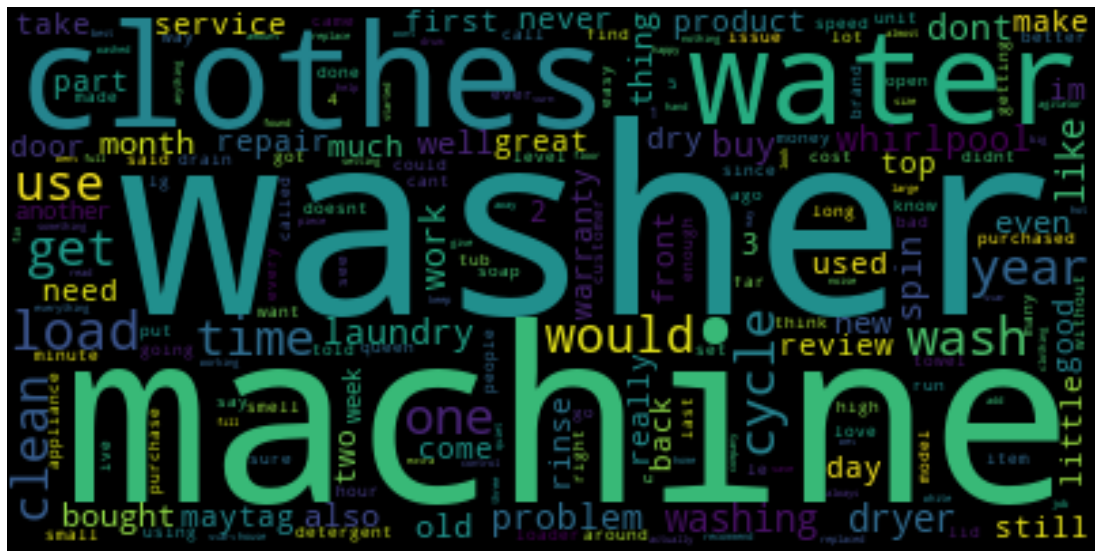

In [ ]:
generateWordCloud(word_frequencies)

We create a word cloud based on negative minus positive reviews. In other words, a word cloud showing which words are more common in negative reviews than in positive reviews. 

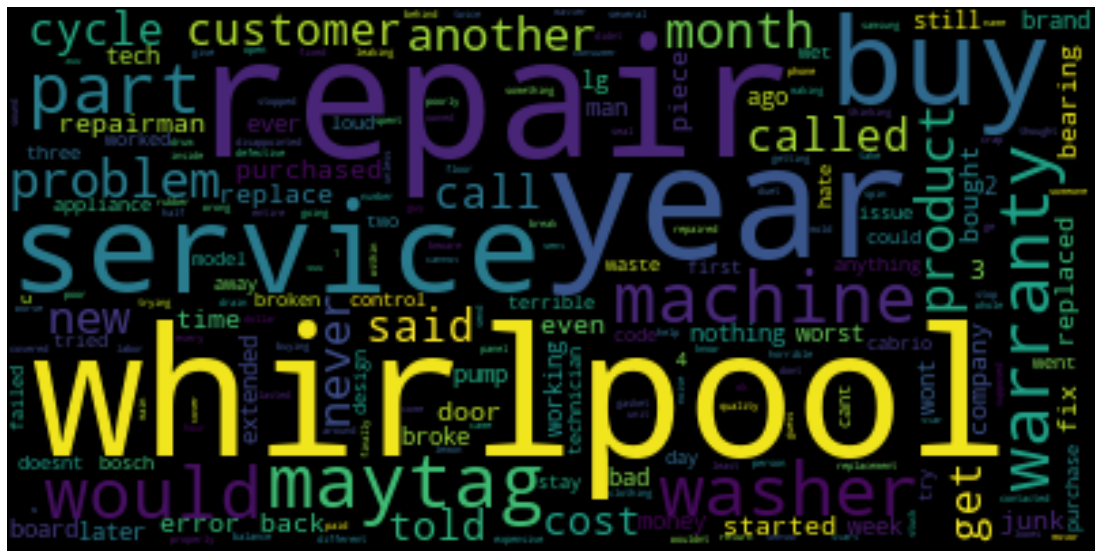

In [ ]:
word_frequencies_pos = generateCorpusWordFrequencies(review_data_pos)
word_frequencies_neg = generateCorpusWordFrequencies(review_data_neg)
word_frequencies_neg_minus_pos = generateWordFrequencyDeltas(word_frequencies_neg,word_frequencies_pos)
generateWordCloud(word_frequencies_neg_minus_pos)